This is a program that models a Quantum Harmonic oscillator as it is periodically "kicked".

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, cosm
from matplotlib.animation import ArtistAnimation
from functools import lru_cache

Matplotlib is building the font cache; this may take a moment.


In [9]:
# Parameters
a = 0.1
m = 1
L = 80
n = int(L / a)
h_bar = 1
omega = 0.1
T = -((h_bar ** 2) / (2 * m * (a ** 2)))
mu_bar = 0.25
dL = 10
dt = 0.1
dx = 1
P = 5
k = 1

# Constants
x_min = -L/2
x_max = L/2
x = np.arange(x_min, x_max, dx)
t_min = 0
t_max = 50

t = np.arange(t_min, t_max, dt)

In [10]:
# Matrices


# x matrix
def x_operator(x):
    return np.diag(x)


# p matrix
def p_operator(x):
    diag_above = np.ones(len(x) - 1)
    diag_below = -np.ones(len(x) - 1)
    p_matrix = 1j * (np.diag(diag_above, k=1) + np.diag(diag_below, k=-1))
    return p_matrix

# p squared
def p_matrix(x):
    diag = np.full(len(x), T * -2)
    diag_above = np.full(len(x)-1, T)
    diag_below = np.full(len(x)-1, T)
    matrix = np.diag(diag) + np.diag(diag_above, k=1) + np.diag(diag_below, k=-1)
    return matrix


In [11]:
#Hamiltonains

def H_0(x):
    x_op = x_operator(x)
    #p_op = p_operator(x)
    return omega/2 * (np.linalg.matrix_power(x_op, 2)) + p_matrix(x)


def H_1(x):
    return mu_bar * cosm(k * x_operator(x))

def H(x):
    return H_0(x) + H_1(x)


def H_times_t(x, t_i):
    dirac_delta = t_i % (P * dt) == 0
    return H_0(x) * dt + H_1(x) * dirac_delta


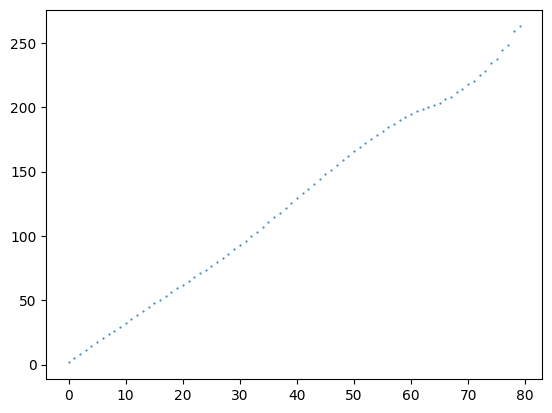

In [12]:
# Eigenvectors and Eigenvalues
eigenvals, eigenvectors = np.linalg.eig(H_0(x))

sorted_indices = np.argsort(eigenvals)
sorted_eigenvals = eigenvals[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

plt.plot(sorted_eigenvals, linestyle='None', marker='.', markersize=1)
plt.show()

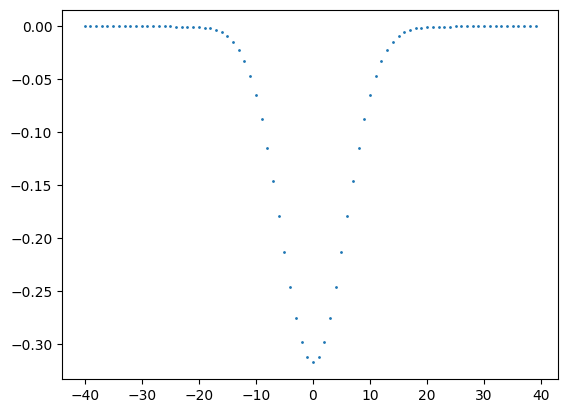

In [13]:
# Psi(x,0)

def psi_0(x):
  return sorted_eigenvectors[:,0]


plt.figure()
plt.scatter(x, psi_0(x), s=1)
plt.show()


C:\Users\naois\AppData\Local\Temp\ipykernel_22816\3084542778.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return wavefunction_0 / np.sqrt(np.trapz(np.abs(wavefunction_0)**2, x))


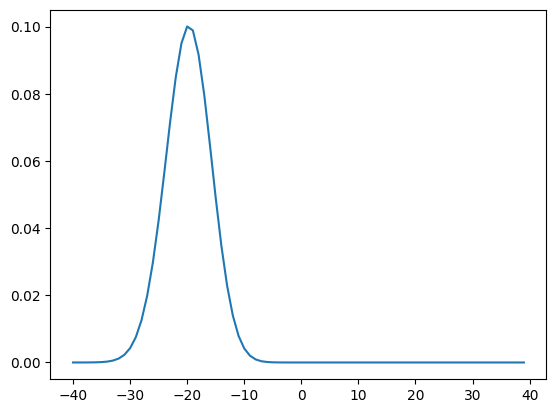

In [14]:
#Phase Operator
def phase(x):
    return (expm(-1j * dL * p_operator(x)) @ psi_0(x))

wavefunction_0 = phase(x)

# Normalizing the wavefunction
def normalized_wavefunction_0(x): 
    return wavefunction_0 / np.sqrt(np.trapz(np.abs(wavefunction_0)**2, x))

plt.plot(x, np.abs(normalized_wavefunction_0(x))**2)
plt.show()

In [15]:
def U(x, t_i):
    return expm(-1j * H_times_t(x, t_i))

@lru_cache(maxsize=4)
def psi(x, i):

    if i == 0:
        return normalized_wavefunction_0(x)

    return U(x, t[i]) @ psi(x, i-1)

simulation = np.array([psi(tuple(x), i) for i, _ in enumerate(t)])


C:\Users\naois\AppData\Local\Temp\ipykernel_22816\3084542778.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return wavefunction_0 / np.sqrt(np.trapz(np.abs(wavefunction_0)**2, x))


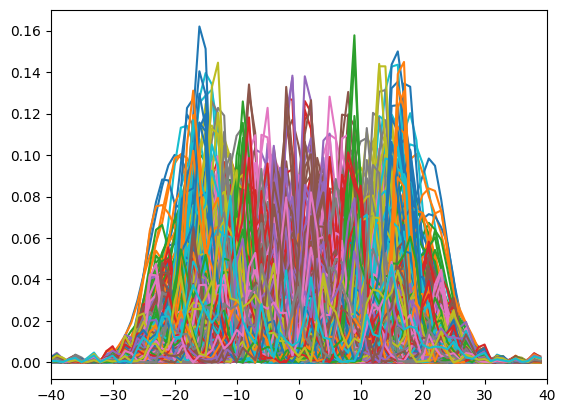

In [16]:
# Animation 

fig = plt.figure()
plt.xlim(x_min, x_max)
anim = ArtistAnimation(fig, [plt.plot(x, np.abs(wavefunction)**2) for wavefunction in simulation], interval=150)
plt.show()
anim.save("animation.gif", writer="pillow")

plt.show()